In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
import neattext.functions as nfx

In [87]:
df = pd.read_csv("vaccination_all_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [88]:
print(df.shape)

(40171, 16)


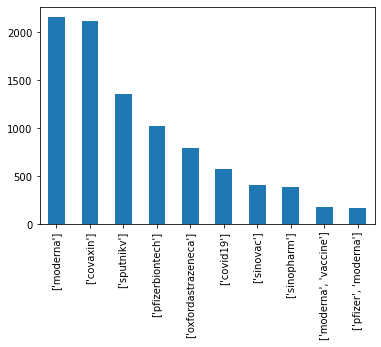

In [89]:
hashtags = df['hashtags'].str.lower()
hashtags.value_counts().nlargest(10).plot(kind='bar')

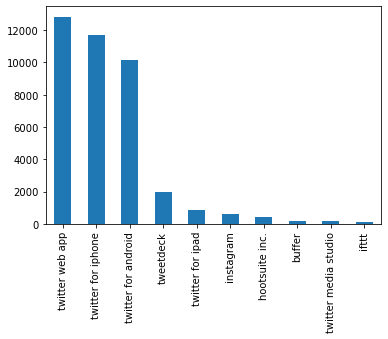

In [90]:
source = df['source'].str.lower()
source.value_counts().nlargest(10).plot(kind='bar')

In [91]:
unique_user = df.drop_duplicates('user_name', keep='last')
unique_user.shape

(22483, 16)

In [92]:
non_verified = df.loc[df['user_verified'] == False]
verified = df.loc[df['user_verified'] == True]

verified_percent = (len(verified) / len(df))*100
print('Verified:', verified_percent)

non_verified_percent = (len(non_verified) / len(df))*100
print('Non-verified:', non_verified_percent)

Verified: 11.291727863384034
Non-verified: 88.70827213661596


In [93]:
df['clean_tweet'] = df['text'].apply(nfx.extract_hashtags)
df[['text', 'clean_tweet']]


,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,[#PfizerBioNTech]
1,While the world has been on the wrong side of ...,[]
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize..."
3,"Facts are immutable, Senator, even when you're...",[]
4,Explain to me again why we need a vaccine @Bor...,"[#whereareallthesickpeople, #PfizerBioNTech…]"
...,...,...
40166,"Selling: #NitrileGloves, #1860 #FaceMasks, #Va...","[#NitrileGloves,, #1860, #FaceMasks,, #Vaccine..."
40167,Limited vaccine manufacturing capacity is a ma...,[#covid19.]
40168,Trust in #AstraZeneca jab in Europe has been s...,[#AstraZeneca]
40169,"State Minister of Production, Supply and Regul...",[]


In [95]:
from textblob import TextBlob

In [100]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [102]:
#df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)


# Read country codes csv

In [46]:
country_df = pd.read_csv("wikipedia-iso-country-codes.csv")
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

,country,alpha2,alpha3,numeric,iso
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [47]:
print(country_df.shape)

(246, 5)


In [48]:
df['country'] = df['user_location']
df = df.merge(country_df, on="country")
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,country,alpha2,alpha3,numeric,iso
0,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,...,NaN,TweetDeck,0,18,False,India,IN,IND,356,ISO 3166-2:IN
1,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,India,IN,IND,356,ISO 3166-2:IN
2,1338551175587786752,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14 18:27:23,...,['Ontario'],Twitter Web App,0,0,False,India,IN,IND,356,ISO 3166-2:IN
3,1338466008466505728,Rachna Tandon,India,"District Epidemiologist, Meerut (IDSP). MDI-Gu...",2014-10-02 20:07:17,72,120,66,False,2020-12-14 12:48:58,...,"['PfizerBioNTech', 'Singapore', 'CovidVaccine']",Twitter Web App,0,0,False,India,IN,IND,356,ISO 3166-2:IN
4,1338377471360569347,India.com,India,Follow https://t.co/RBTHZHv1ga for breaking ne...,2009-03-04 16:20:07,13417,399,349,True,2020-12-14 06:57:09,...,"['Pfizervaccine', 'PfizerBioNTech']",TweetDeck,0,0,False,India,IN,IND,356,ISO 3166-2:IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,1375540506667573250,Peter Byard Davis,New Zealand,"Ex-prof, recovering workaholic, quiz kid. Soci...",2011-09-10 03:57:58,1244,93,580,False,2021-03-26 20:09:47,...,NaN,Twitter Web App,0,0,False,New Zealand,NZ,NZL,554,ISO 3166-2:NZ
3670,1375064010501066753,The General,Namibia,Manchester United ⚽️| I Am Good But I Am Not A...,2012-03-18 16:54:40,1629,1605,1872,False,2021-03-25 12:36:22,...,NaN,Twitter for Android,0,0,False,Namibia,NaN,NAM,516,ISO 3166-2:NA
3671,1373496087420547074,Daily Ummah International,Turkey,Bir miladın habercisiyiz • We are the messenge...,2020-10-15 20:35:56,70,2,1,False,2021-03-21 04:46:00,...,"['Pakistan', 'COVID', 'Imran', 'Khan', 'China']",Twitter Web App,0,0,False,Turkey,TR,TUR,792,ISO 3166-2:TR
3672,1374438996990775310,marcosecchi,Slovenia,▸Leica Photographer @GettyImages\n▸Fine Art & ...,2009-02-20 21:14:47,12880,894,76326,True,2021-03-23 19:12:47,...,"['covid', 'vaccine', 'sputnik', 'sputnikv']",SocialPilot.co,0,0,False,Slovenia,SI,SVN,705,ISO 3166-2:SI


In [49]:
tw_add_df = df.groupby(["country"])['text'].count().reset_index()
tw_add_df.columns = ["country", "tweets"]
country_tweets_df = tw_add_df.sort_values('tweets', ascending=False).head(20)
country_tweets_df    

,country,tweets
49,India,1108
116,United States,396
115,United Kingdom,202
20,Canada,159
67,Malaysia,157
46,Hong Kong,138
83,Pakistan,120
114,United Arab Emirates,101
36,France,95
104,Sri Lanka,89


In [50]:
fig = px.bar(country_tweets_df, x='country', y='tweets')
fig.update_layout(template='none')
fig.show()